In [38]:
from obspy import read
import numpy as np
from eruption_forecast import Calculate
from eruption_forecast.utils import detect_outliers
from obspy.signal.filter import bandpass
from datetime import timedelta

In [39]:
st = read(r"D:\Data\OJN\2025\VG\OJN\EHZ.D\VG.OJN.00.EHZ.D.2025.001")

In [40]:
type(st.traces[0])

obspy.core.trace.Trace

In [41]:
trace = st[0]

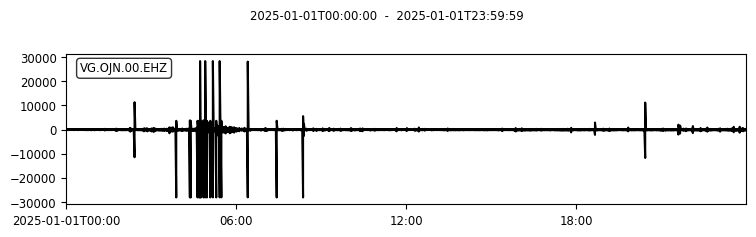

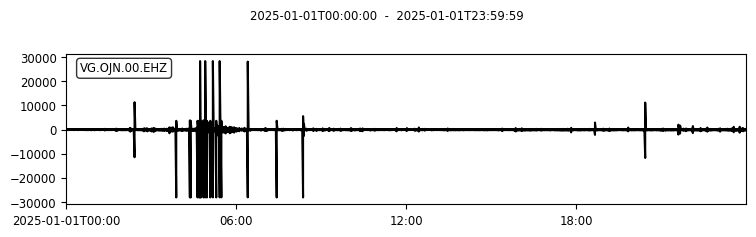

In [42]:
trace.plot()

In [46]:
trace.data[8639900]

np.int32(-87)

In [36]:
trace.data = bandpass(trace.data[0:8640000], freqmin=0.01, freqmax=0.1, df=100)

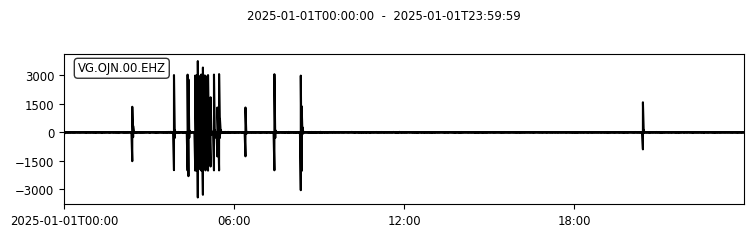

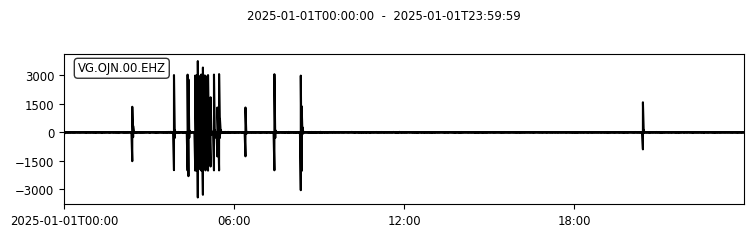

In [37]:
trace.plot()

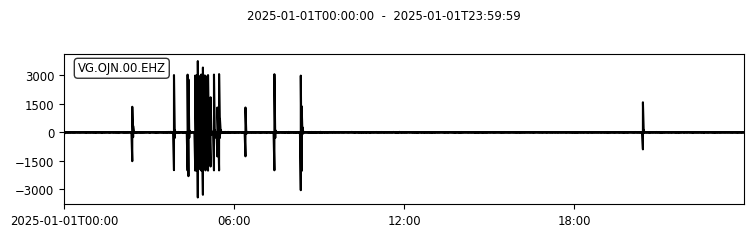

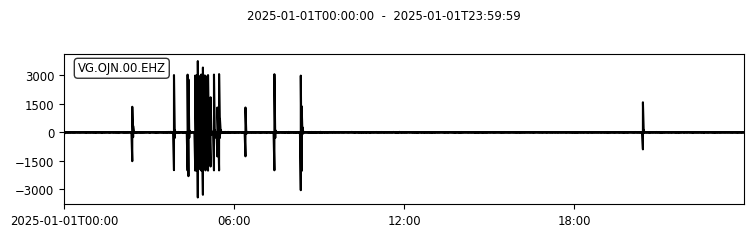

In [19]:
trace.filter("bandpass", freqmin=0.01, freqmax=0.1).plot()

In [5]:
trace.stats.starttime + timedelta(days=1) - timedelta(milliseconds=1)

2025-01-01T23:59:59.999000Z

In [6]:
number_of_sample_per_day = 100 * 3600 * 24
number_of_sample_per_ten_minutes = 100 * 60 * 10
number_of_window = number_of_sample_per_day / number_of_sample_per_ten_minutes
int(number_of_window)

144

In [ ]:
calculate = Calculate(
    station="OJN",
    channel="EHN",
    start_date="2025-01-10",
    end_date="2025-08-24",
    window_size=2,
    day_to_forecast=2,
    verbose=True,
    debug=True,
)

In [ ]:
series = calculate.calculate_rsam(st)

In [ ]:
end_time = series.index[60000] + timedelta(minutes=10) - timedelta(seconds=0.01)

In [ ]:
sliced = series[series.index[60000] : end_time]

In [ ]:
data = sliced.values

In [ ]:
end_time, len(data)

In [ ]:
max_index = np.argmax(data)

In [ ]:
max_value = data[max_index]

In [ ]:
max_index, max_value

In [ ]:
sliced.index[max_index]

In [ ]:
series[sliced.index[max_index]]

In [ ]:
new_series = np.delete(series, 2714)

In [ ]:
new_series / 10000